In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import cv2 as cv
import os
from tensorflow.keras import regularizers


In [ ]:
# %cd /content/drive/MyDrive/train_cnn_eyes
# !mkdir train_images
# %cd train_images
# !unzip ../data_new


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


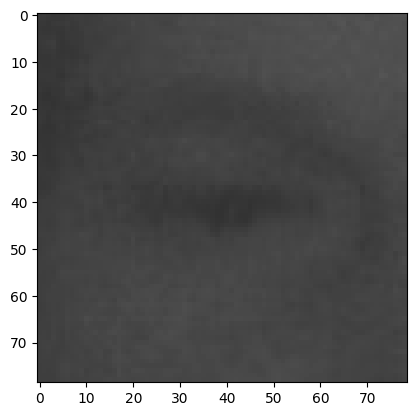

In [5]:
img=cv.imread('/content/drive/MyDrive/train_cnn_eyes/train_images/data_new/train/open eyes/1 - Copy.png',0)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
def load_images_from_folder(folder,X,y,label):
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename),0)
        X.append(img)
        y.append(label)
        # if img.shape[0]==103:
        #     count+=1
        #     img=cv2.resize(img,(79,79))
        #     cv2.imwrite(f'{folder_target}{count}.png',img)
    # return count

In [7]:
X_train=[]
y_train=[]
label_open=1
label_close=0
folder_open_train='/content/drive/MyDrive/train_cnn_eyes/train_images/data_after2/train/open eyes'
folder_close_train='/content/drive/MyDrive/train_cnn_eyes/train_images/data_after2/train/close eyes'
load_images_from_folder(folder_open_train,X_train,y_train,label_open)
load_images_from_folder(folder_close_train,X_train,y_train,label_close)

In [101]:
# label_open=1
# label_close=0
# folder_open_train='/content/drive/MyDrive/train_cnn_eyes/data_add2/train/open eyes'
# folder_close_train='/content/drive/MyDrive/train_cnn_eyes/data_add2/train/close eyes'
# load_images_from_folder(folder_open_train,X_train,y_train,label_open)
# load_images_from_folder(folder_close_train,X_train,y_train,label_close)

In [122]:
# label_open=1
# label_close=0
# folder_open_train='/content/drive/MyDrive/train_cnn_eyes/train_images/data_new/train/open eyes'
# folder_close_train='/content/drive/MyDrive/train_cnn_eyes/train_images/data_new/train/close eyes'
# load_images_from_folder(folder_open_train,X_train,y_train,label_open)
# load_images_from_folder(folder_close_train,X_train,y_train,label_close)

In [8]:
X_test=[]
y_test=[]
label_open=1
label_close=0
folder_open_test='/content/drive/MyDrive/train_cnn_eyes/train_images/data_after2/test/open eyes'
folder_close_test='/content/drive/MyDrive/train_cnn_eyes/train_images/data_after2/test/close eyes'
load_images_from_folder(folder_open_test,X_test,y_test,label_open)
load_images_from_folder(folder_close_test,X_test,y_test,label_close)

In [124]:
# label_open=1
# label_close=0
# folder_open_test='/content/drive/MyDrive/train_cnn_eyes/data_add/train/open eyes'
# folder_close_test='/content/drive/MyDrive/train_cnn_eyes/data_add/train/close eyes'
# load_images_from_folder(folder_open_test,X_test,y_test,label_open)
# load_images_from_folder(folder_close_test,X_test,y_test,label_close)

In [125]:
# label_open=1
# label_close=0
# folder_open_test='/content/drive/MyDrive/train_cnn_eyes/train_images/data_new/test/open eyes'
# folder_close_test='/content/drive/MyDrive/train_cnn_eyes/train_images/data_new/test/close eyes'
# load_images_from_folder(folder_open_test,X_test,y_test,label_open)
# load_images_from_folder(folder_close_test,X_test,y_test,label_close)

In [9]:
print(len(X_test),len(y_test))
print(len(X_train),len(y_train))

1341 1341
6000 6000


In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [11]:
type(X_train)
print(type(y_train))

<class 'numpy.ndarray'>


In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train[1])

[0. 1.]


In [13]:
X_train=X_train.reshape(6000,79,79,1)
X_test=X_test.reshape(1341,79,79,1)

In [ ]:
# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(79,79,1),padding='same'))
# model.add(MaxPool2D(pool_size=(2,2),strides=2))
# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(79,79,1),padding='same'))
# model.add(MaxPool2D(pool_size=(2,2),strides=2))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# model.add(MaxPool2D(pool_size=(2,2),strides=2))
# model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# model.add(MaxPool2D(pool_size=(2,2),strides=2))
# model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# # model.add(MaxPool2D(pool_size=(2,2),strides=2))
# # model.add(MaxPool2D())
# model.add(Flatten())
# model.add(Dense(10,activation='relu'))
# model.add(Dense(5,activation='relu'))
# model.add(Dense(2,activation='softmax'))
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()
# #https://poloclub.github.io/cnn-explainer/#article-convolution


In [56]:
# model = Sequential()
# model.add(Conv2D(128, (3, 3), input_shape=(79,79,1),activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3),activation='relu'))
# # model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (3, 3),activation='relu'))
# # model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(16, (3, 3),activation='relu'))
# # model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [56]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(79,79,1),padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(79,79,1),padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
# model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 79, 79, 32)        832       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 39, 39, 32)        25632     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 19, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 15, 15, 32)        25632     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 7, 7, 32)       

In [57]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=180)

Epoch 1/30
34/34 [==============================] - 4s 37ms/step - loss: 1.2819 - accuracy: 0.5895 - val_loss: 1.0460 - val_accuracy: 0.5235
Epoch 2/30
34/34 [==============================] - 1s 29ms/step - loss: 0.9228 - accuracy: 0.7932 - val_loss: 0.9068 - val_accuracy: 0.7584
Epoch 3/30
34/34 [==============================] - 1s 29ms/step - loss: 0.8119 - accuracy: 0.8647 - val_loss: 0.8136 - val_accuracy: 0.8404
Epoch 4/30
34/34 [==============================] - 1s 29ms/step - loss: 0.7479 - accuracy: 0.8935 - val_loss: 0.7439 - val_accuracy: 0.8740
Epoch 5/30
34/34 [==============================] - 1s 29ms/step - loss: 0.7042 - accuracy: 0.9102 - val_loss: 0.6700 - val_accuracy: 0.9411
Epoch 6/30
34/34 [==============================] - 1s 33ms/step - loss: 0.6736 - accuracy: 0.9125 - val_loss: 0.6849 - val_accuracy: 0.9172
Epoch 7/30
34/34 [==============================] - 1s 33ms/step - loss: 0.6413 - accuracy: 0.9052 - val_loss: 0.5694 - val_accuracy: 0.9277
Epoch 8/30
34

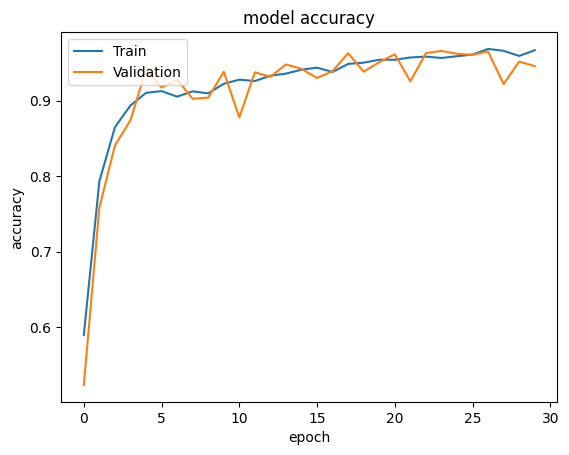

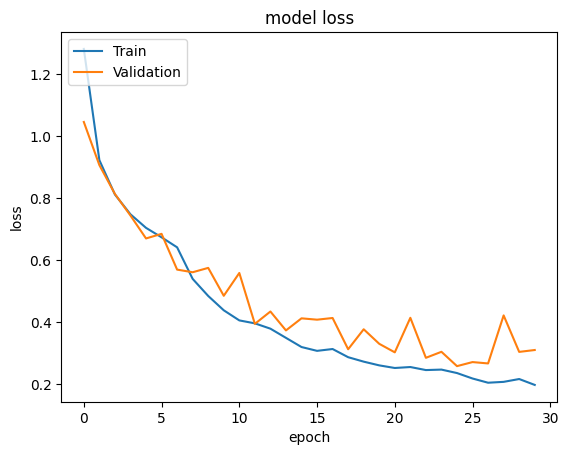

In [58]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [155]:
def load_images_from_folder(folder,X):
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename),0)
        X.append(img)

In [158]:
X_thu=[]
folder='/content/drive/MyDrive/train_cnn_eyes/test/test'
load_images_from_folder(folder,X_thu)
X_thu = np.array(X_thu)
print(X_thu.shape)
X_thu=X_thu.reshape(7,79,79,1)

(7, 79, 79)


In [159]:
y_hat=model.predict(X_thu)


1/1 [==============================] - 0s 253ms/step


In [160]:
y_label=np.argmax(y_hat,axis=1)
y_label

array([1, 0, 1, 0, 0, 0, 1])

In [2]:
plt.imshow(X_thu[0])


NameError: ignored

In [ ]:
model.save('/content/drive/MyDrive/train_cnn_eyes/close_open_eyes.h5')